# **Overview**
Goal : Goal is to use data from a mental health survey to explore factors that may cause individuals to experience depression.
Dataset : Exploring Mental Health Data
(https://www.kaggle.com/competitions/playground-series-s4e11/overview)


### Tools and Technologies

In [1]:
!pip install scikit-learn==1.3.1

# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# Visualization libraries
import matplotlib.pyplot as plt #for ploting graphs
import seaborn as sns #advance than matplot plot the relational plots

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder,StandardScaler #these are preprocessing techniques where minimaxscale between 0 to 1 ,
                                                                                          #standard scaler with normal distribution
                                                                                          #one hot encoder for encoding categorical into binary with nominal columns
                                                                                          #labelencoder converts ordinal columns

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV  #split the data for validating model perpormance ,
                                                                                      #gridsearchcv hypertuning technique for improving model  accuracy
                                                                                      #randomsearchcv  better for time saving but give robust result
from imblearn.over_sampling import SMOTE  #for imbalance columns so create synthetic rows

# Machine learning models
from sklearn.dummy import DummyClassifier  #for setting baseline
from sklearn.linear_model import LogisticRegression #use logistic probability for prediction
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier #ensemble techniques, used multipletrees for predicting decisions and extratree is same as earlier but provide fast and robust response
from xgboost import XGBClassifier  #gradient boosting techniques best for struct and tabular data

# Performance metrics
from sklearn.metrics import mean_squared_error,classification_report,accuracy_score,log_loss


from scipy.stats import zscore


# !pip install --upgrade scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


### Read-Data

In [2]:
# sample = pd.read_csv('/content/sample_submission.csv')
# test = pd.read_csv('/content/test.csv')
# train = pd.read_csv('/content/train.csv')

In [3]:
sample = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [4]:
from sklearn.dummy import DummyClassifier

# print(train.head(n=5))
num = train.select_dtypes(include=np.number).columns
# print(num)
# print(train['Depression'])
# Define features (X) and target (y)
X = train[num]  # Using all available numerical features
y = train['Depression']  # Replace 'target' with actual target column

# Split into train and test (if not already split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train DummyClassifier (Most Frequent Strategy)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Make predictions
y_pred = dummy_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy using DummyClassifier: {accuracy:.4f}")


Baseline Accuracy using DummyClassifier: 0.8168


# **Data Understanding**

### Train Data Analysis

In [5]:
train.shape

(140700, 20)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
train['Academic Pressure']

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0         NaN
1         NaN
2         5.0
3         NaN
4         NaN
         ... 
140695    NaN
140696    NaN
140697    NaN
140698    NaN
140699    4.0
Name: Academic Pressure, Length: 140700, dtype: float64

In [8]:
train['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

In [9]:
train['Depression'].value_counts(normalize=True)

Depression
0    0.818287
1    0.181713
Name: proportion, dtype: float64

In [10]:
train.head(n=5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [11]:
train.tail(n=1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
140699,140699,Sai,Male,27.0,Patna,Student,NaN,4.0,NaN,9.24,1.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [12]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [13]:
train.nunique()

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64

In [14]:
train.duplicated().sum()

0

In [15]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [16]:
num = train.select_dtypes(include= np.number).columns

In [17]:
for col in num:
  print(col,train[col].corr(train['Depression']))

id 0.003943598772659356
Age -0.564671210717087
Academic Pressure 0.4750365529671638
Work Pressure 0.21663351195435007
CGPA 0.021729017389573845
Study Satisfaction -0.16801363299518327
Job Satisfaction -0.16854291793909604
Work/Study Hours 0.19174619566204804
Financial Stress 0.22723654200739332
Depression 1.0


In [18]:
train['Academic Pressure'].corr(train['Depression'])


0.4750365529671638

In [19]:
train['Financial Stress'].corr(train['Depression'])

0.22723654200739332

### Test Data Analysis

In [20]:
test.shape

(93800, 19)

In [21]:
test.value_counts()

Series([], Name: count, dtype: int64)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [23]:
test['Age'].value_counts(normalize=True)

Age
56.00    0.036588
49.00    0.036514
38.00    0.032068
53.00    0.031535
57.00    0.030650
47.00    0.029211
46.00    0.029083
18.00    0.027868
59.00    0.027196
54.00    0.027175
51.00    0.027122
43.00    0.026716
48.00    0.026215
20.00    0.024893
45.00    0.024829
50.00    0.024638
24.00    0.024478
42.00    0.024467
28.00    0.024435
39.00    0.024296
44.00    0.023902
29.00    0.022942
41.00    0.022313
33.00    0.021930
58.00    0.021130
25.00    0.020821
40.00    0.020789
35.00    0.020682
21.00    0.020576
55.00    0.020501
23.00    0.019936
37.00    0.019072
34.00    0.019030
36.00    0.018571
19.00    0.018454
27.00    0.018326
60.00    0.018134
52.00    0.017985
31.00    0.017697
22.00    0.015107
26.00    0.014520
30.00    0.014510
32.00    0.013081
32.08    0.000011
Name: proportion, dtype: float64

In [24]:
test.head(n=5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [25]:
test.tail(n=1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
93799,234499,Gauri,Female,43.0,Varanasi,Working Professional,Educational Consultant,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,B.Ed,No,11.0,2.0,No


In [26]:
test['Academic Pressure']

0        NaN
1        NaN
2        NaN
3        5.0
4        NaN
        ... 
93795    NaN
93796    NaN
93797    1.0
93798    NaN
93799    NaN
Name: Academic Pressure, Length: 93800, dtype: float64

In [27]:
test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [28]:
test.nunique()

id                                       93800
Name                                       374
Gender                                       2
Age                                         44
City                                        68
Working Professional or Student              2
Profession                                  64
Academic Pressure                            5
Work Pressure                                5
CGPA                                       326
Study Satisfaction                           5
Job Satisfaction                             5
Sleep Duration                              31
Dietary Habits                              22
Degree                                      87
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
dtype: int64

In [29]:
test.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,27077.871962,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


In [30]:
test['Academic Pressure'].corr(test['Financial Stress'])

0.1508013820107709

In [31]:
test.duplicated().sum()

0

# **EDA(Exploratory Data Analysis)**

### Descriptive Statistics

In [32]:
print(train.select_dtypes(include = np.number).skew())      # Skewness


id                   -1.086176e-16
Age                  -2.179765e-01
Academic Pressure    -1.339765e-01
Work Pressure         1.851506e-02
CGPA                 -7.363650e-02
Study Satisfaction    1.176385e-02
Job Satisfaction      5.436123e-02
Work/Study Hours     -1.281687e-01
Financial Stress      3.560320e-02
Depression            1.650852e+00
dtype: float64


In [33]:
print(train.select_dtypes(include = np.number
                          ).kurtosis())  # Kurtosis

id                   -1.200000
Age                  -1.149302
Academic Pressure    -1.163739
Work Pressure        -1.295189
CGPA                 -1.229219
Study Satisfaction   -1.225619
Job Satisfaction     -1.304939
Work/Study Hours     -1.283424
Financial Stress     -1.313662
Depression            0.725321
dtype: float64


### OutLiers

In [34]:
z_scores = np.abs(zscore(train.select_dtypes(include=[np.number])))  # Z-score method
outliers = (z_scores > 3).sum()  # Count outliers
print("Outliers per feature:\n", outliers)

Outliers per feature:
 id                    0
Age                   0
Academic Pressure     0
Work Pressure         0
CGPA                  0
Study Satisfaction    0
Job Satisfaction      0
Work/Study Hours      0
Financial Stress      0
Depression            0
dtype: int64


### HISTOGRAM

In [35]:
# plt.figure(figsize=(12,10))
# for i, col in enumerate(num, 1):
#     plt.subplot(5, 3, i)
#     sns.histplot(data=train, x=col, hue="Depression", kde=True, bins=30)
#     plt.title(f"Distribution of {col} by Depression")

#     # Move legend outside
#     plt.legend(title="Depression", bbox_to_anchor=(1, 1), loc="upper left", fontsize=8)

# plt.tight_layout()
# plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

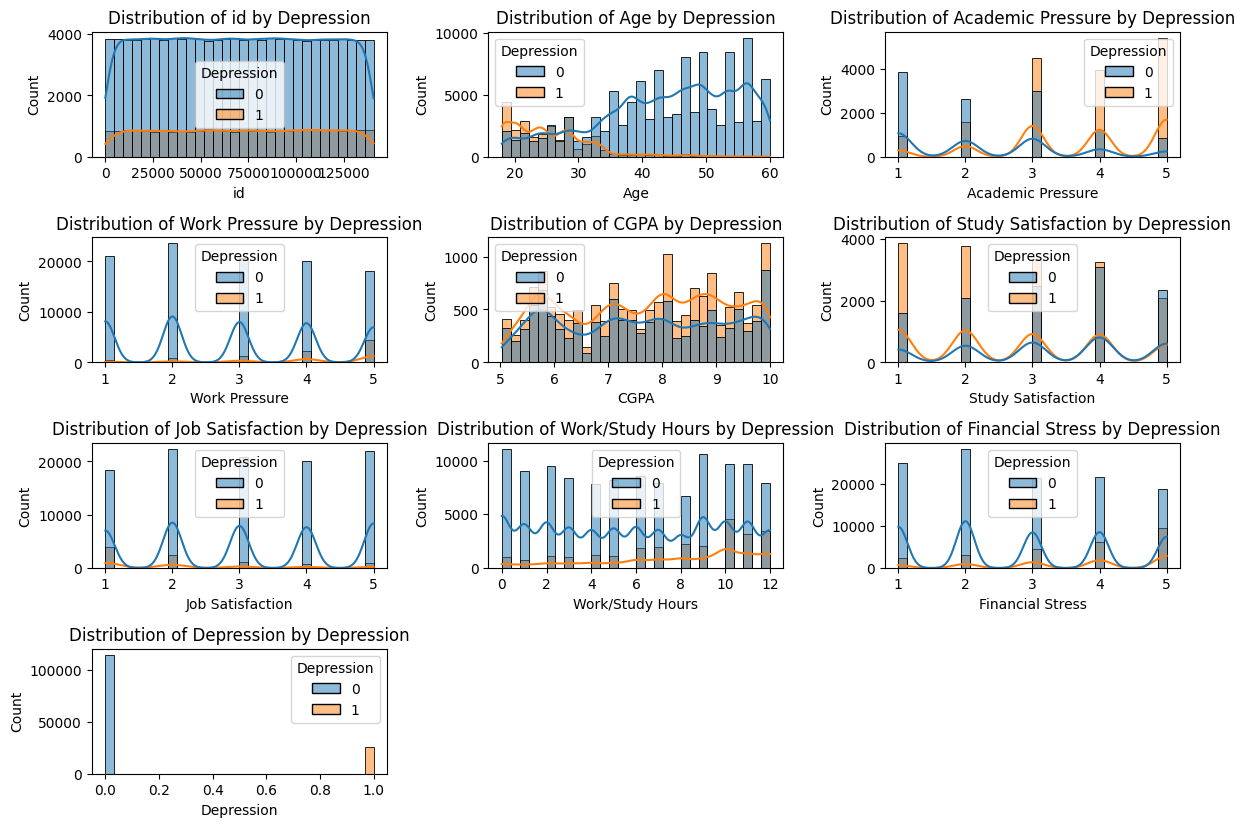

In [36]:

plt.figure(figsize=(12,10))
for i,col in enumerate(num,1):

    plt.subplot(5, 3, i)
    sns.histplot(data=train, x=col, hue="Depression", kde=True, bins=30)
    plt.title(f"Distribution of {col} by Depression")
plt.tight_layout()
plt.show()


### BOXPLOT

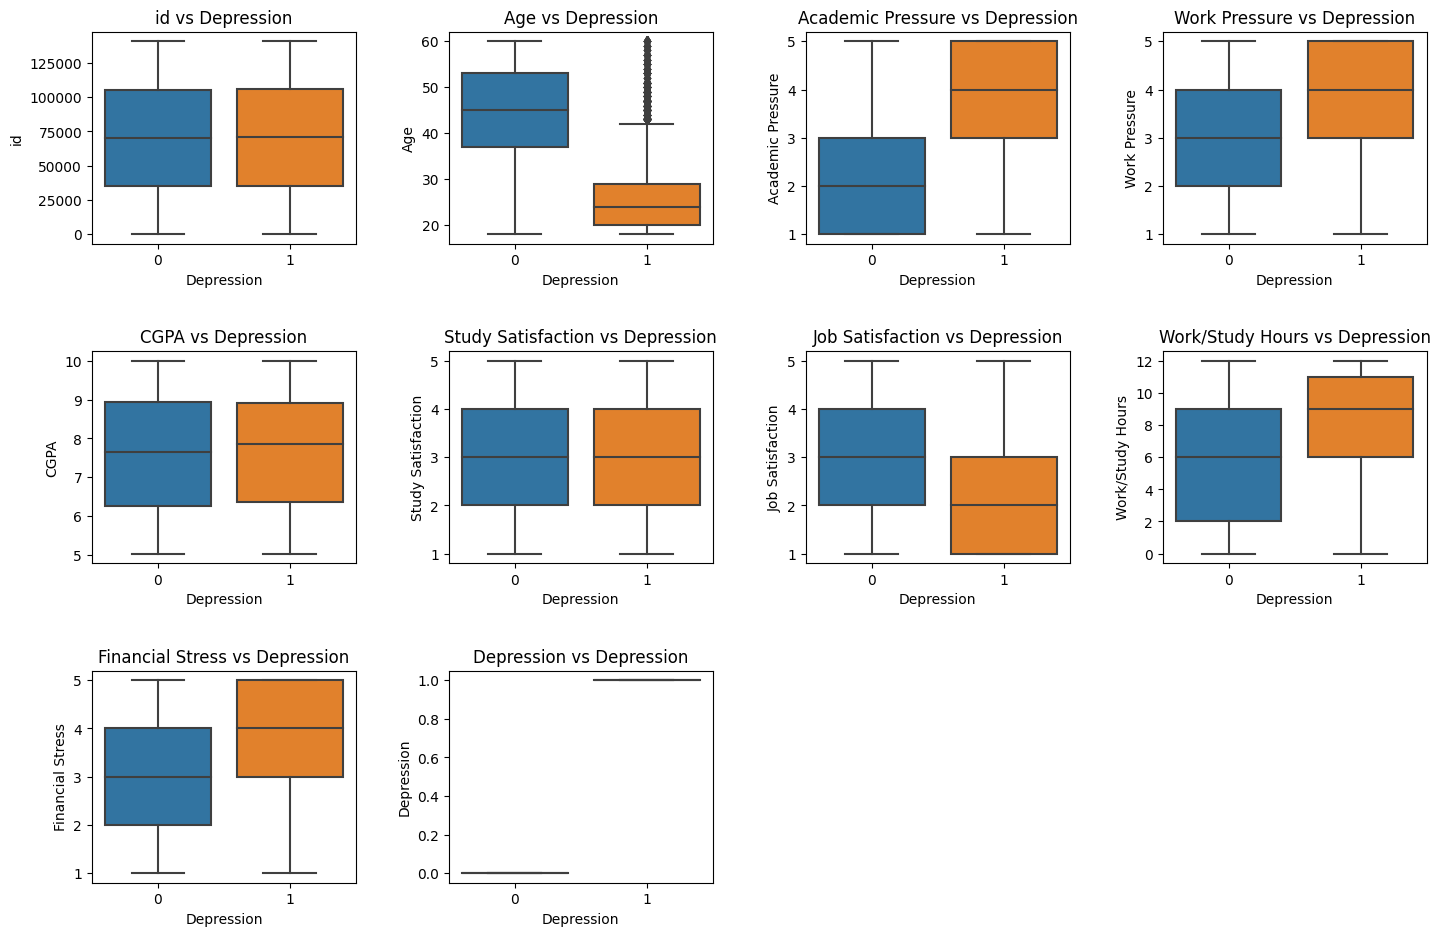

In [37]:
num_cols = train.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=train['Depression'], y=train[col])  # Group by Depression (0/1)
    plt.title(f'{col} vs Depression')
plt.tight_layout(pad=3.0)
plt.show()


### HEATMAP

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


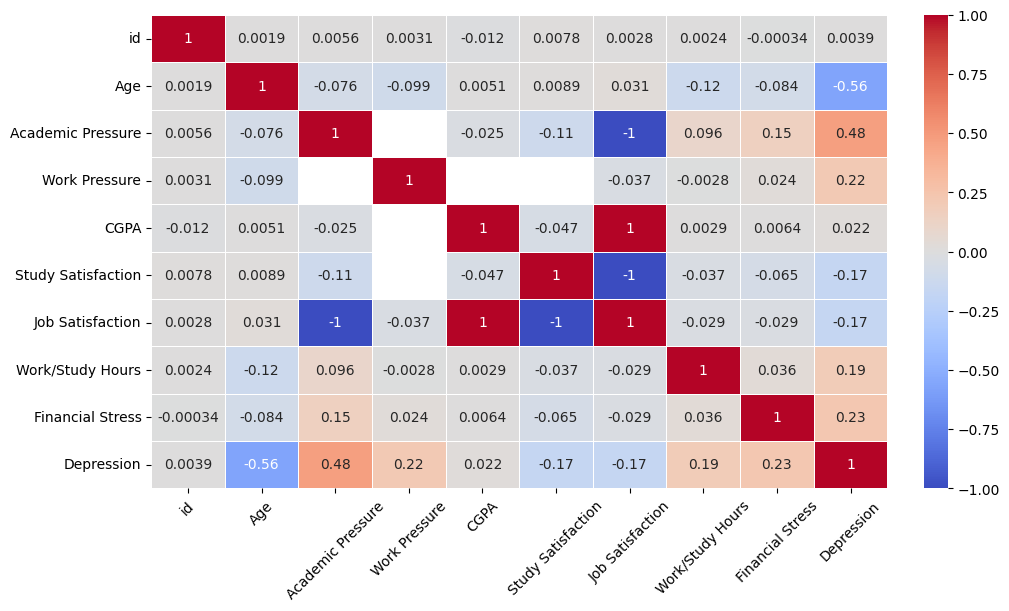

In [38]:

plt.figure(figsize=(10, 6), layout='constrained')
sns.heatmap(train.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=True, linewidths=0.7) #heatmap is only applicable on numerical feature
plt.xticks(rotation=45)
plt.show()


### COUNTPLOT

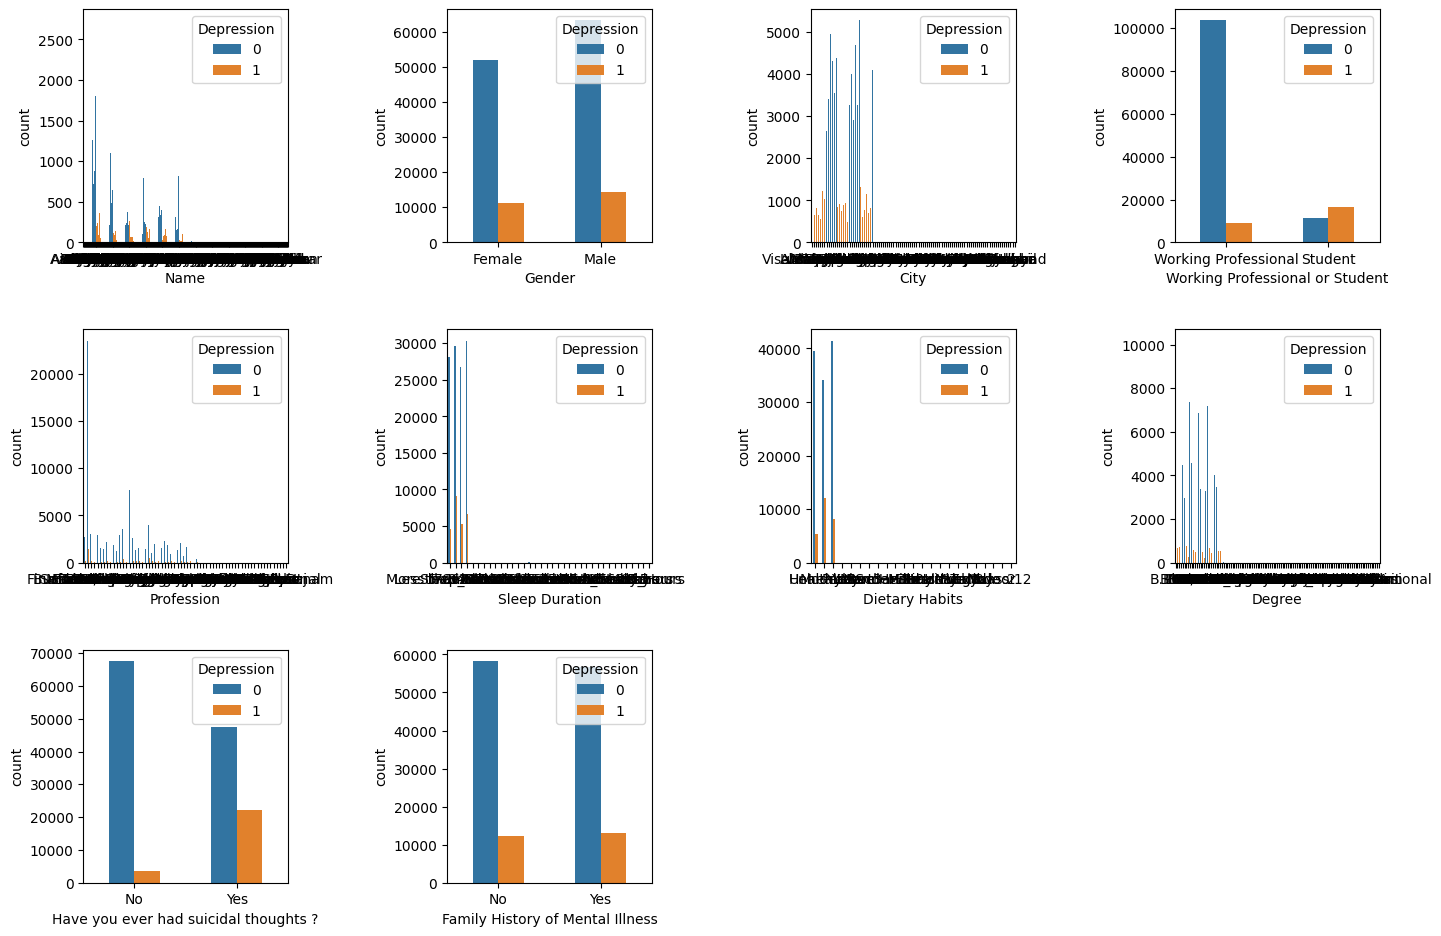

In [39]:

cat_columns=train.select_dtypes(exclude=np.number).columns
plt.figure(figsize=(15,10))
for i ,col in enumerate(cat_columns):
  plt.subplot(3,4,i+1)
  sns.countplot(hue=train['Depression'],x = train[col],width = 0.5) #to know imbalance in target class
plt.tight_layout(pad=3.0)
plt.show()

In [40]:
#sns.pairplot(train, hue='Depression')
#plt.show()


 **Keep (Highly Influential)** ->  Suicidal thoughts, Family history, Academic pressure, Work pressure
Financial stress, Work/Study status, Job & Study satisfaction
Work/Study hours, Age

**Moderate (May Retain/Transform)** ->  Gender, Sleep duration, Dietary habits, Degree, Profession

**Drop (Irrelevant)** ->  Name, City, CGPA (weak correlation), Overall Depression Distribution (if redundant)

# **Data Preprocessing**


In [41]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [42]:
test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

## Handling null values

In [43]:

for col in num_cols:
    train[col] = train[col].fillna(train[col].median())  # Fill missing numerical values with mean

for col in cat_columns:
    train[col] = train[col].fillna(train[col].mode()[0])  # Fill missing categorical values with mode

train['Profession'] = train['Profession'].fillna('Student')  # Fill missing 'Profession' values

train['Dietary Habits'] = train['Dietary Habits'].fillna('Unknown')  # Fill missing 'Dietary Habits' instead of dropping rows


Median imputation was chosen due to dataset skewness, as mean suits symmetric data, and mode is for categorical data.

In [44]:
train.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [45]:
num_test_cols = test.select_dtypes(include=np.number).columns
for col in num_test_cols:
    test[col] = test[col].fillna(test[col].mean())

# Fill missing categorical values with mode
cat_test_columns = test.select_dtypes(exclude=np.number).columns
for col in cat_test_columns:
    test[col] = test[col].fillna(test[col].mode()[0])  # Use mode()[0] instead of dropping

# Fill specific categorical column with a default value
test['Profession'] = test['Profession'].fillna('Student')

# Fill missing 'Dietary Habits' values with mode instead of dropping rows
test['Dietary Habits'] = test['Dietary Habits'].fillna(test['Dietary Habits'].mode()[0])

In [46]:
test.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

## Drop Unnecessary Columns


In [47]:
train.drop(['Name','City','CGPA','Profession','Degree'],axis=1,inplace=True)
test.drop(['Name','CGPA','City','Profession','Degree'],axis=1,inplace=True)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   Working Professional or Student        140700 non-null  object 
 4   Academic Pressure                      140700 non-null  float64
 5   Work Pressure                          140700 non-null  float64
 6   Study Satisfaction                     140700 non-null  float64
 7   Job Satisfaction                       140700 non-null  float64
 8   Sleep Duration                         140700 non-null  object 
 9   Dietary Habits                         140700 non-null  object 
 10  Have you ever had suicidal thoughts ?  140700 non-null  

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Gender                                 93800 non-null  object 
 2   Age                                    93800 non-null  float64
 3   Working Professional or Student        93800 non-null  object 
 4   Academic Pressure                      93800 non-null  float64
 5   Work Pressure                          93800 non-null  float64
 6   Study Satisfaction                     93800 non-null  float64
 7   Job Satisfaction                       93800 non-null  float64
 8   Sleep Duration                         93800 non-null  object 
 9   Dietary Habits                         93800 non-null  object 
 10  Have you ever had suicidal thoughts ?  93800 non-null  object 
 11  Wo

## Encode Categorical Variables

In [50]:
encode = ['Gender','Working Professional or Student',
          'Have you ever had suicidal thoughts ?','Family History of Mental Illness']
label_encoder = LabelEncoder()
for col in encode:
  train[col]=label_encoder.fit_transform(train[col])


In [51]:
train.head(n=5)

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,0,49.0,1,3.0,5.0,3.0,2.0,More than 8 hours,Healthy,0,1.0,2.0,0,0
1,1,1,26.0,1,3.0,4.0,3.0,3.0,Less than 5 hours,Unhealthy,1,7.0,3.0,0,1
2,2,1,33.0,0,5.0,3.0,2.0,3.0,5-6 hours,Healthy,1,3.0,1.0,0,1
3,3,1,22.0,1,3.0,5.0,3.0,1.0,Less than 5 hours,Moderate,1,10.0,1.0,1,1
4,4,0,30.0,1,3.0,1.0,3.0,1.0,5-6 hours,Unhealthy,1,9.0,4.0,1,0


In [52]:
encode_label = ['Gender','Working Professional or Student','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
label_encoder = LabelEncoder()
for col in encode_label:
  test[col]=label_encoder.fit_transform(test[col])


In [53]:
test.head(n=5)

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,1,53.0,1,3.158576,2.000000,2.939522,5.00000,Less than 5 hours,Moderate,0,9.0,3.0,1
1,140701,0,58.0,1,3.158576,2.000000,2.939522,4.00000,Less than 5 hours,Moderate,0,6.0,4.0,0
2,140702,1,53.0,1,3.158576,4.000000,2.939522,1.00000,7-8 hours,Moderate,1,12.0,4.0,0
3,140703,0,23.0,0,5.000000,3.011797,1.000000,2.96092,More than 8 hours,Moderate,1,10.0,4.0,0
4,140704,1,47.0,1,3.158576,5.000000,2.939522,5.00000,7-8 hours,Moderate,1,3.0,4.0,0


For the "**Dietary Habits**" column, the best approach depends on the goal:

Method	When to Use?

Valid Category Filtering (value counts, regex)	To clean categorical data by keeping only meaningful categories	Simple, efficient, keeps relevant values	Requires manual category selection

TF-IDF (Term Frequency-Inverse Document Frequency)	If you want to analyze the importance of dietary terms across many entries	Good for understanding word importance, works well for textual data	Doesn't maintain category structure, not ideal for categorical labels

CountVectorizer	If you need numerical encoding for a machine learning model	Converts text into features, useful for ML models	Creates sparse matrices, less interpretable for categorical data





In [54]:
train['Dietary Habits'].value_counts()


Dietary Habits
Moderate             49709
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [55]:
valid_categories = ['Healthy','Unhealthy','Moderate']
train['Dietary Habits'] = train['Dietary Habits'].apply(lambda x : x if x in valid_categories else np.nan)
train['Dietary Habits'].fillna(train['Dietary Habits'].mode()[0],inplace=True)

print(train['Dietary Habits'].unique())
print(train['Dietary Habits'].value_counts())

['Healthy' 'Unhealthy' 'Moderate']
Dietary Habits
Moderate     49732
Unhealthy    46227
Healthy      44741
Name: count, dtype: int64


<ipython-input-55-d743b76f8806>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Dietary Habits'].fillna(train['Dietary Habits'].mode()[0],inplace=True)


In [56]:
train['Dietary Habits'].isna().sum()

0

In [57]:
train['Dietary Habits']=label_encoder.fit_transform(train['Dietary Habits'])


In [58]:
valid_categories = ['Healthy','Unhealthy','Moderate']
test['Dietary Habits'] = test['Dietary Habits'].apply(lambda x : x if x in valid_categories else np.nan)
test['Dietary Habits'].fillna(test['Dietary Habits'].mode()[0],inplace=True)

print(test['Dietary Habits'].unique())
print(test['Dietary Habits'].value_counts())

['Moderate' 'Healthy' 'Unhealthy']
Dietary Habits
Moderate     33048
Unhealthy    30786
Healthy      29966
Name: count, dtype: int64


<ipython-input-58-b1f7ea7711b7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Dietary Habits'].fillna(test['Dietary Habits'].mode()[0],inplace=True)


In [59]:
test['Dietary Habits'].isna().sum()

0

Use Label Encoding if our model can handle ordinal relationships (e.g., decision trees).

Use One-Hot Encoding for algorithms like logistic regression, which require categorical data in separate columns.

In [60]:
test['Dietary Habits']=label_encoder.fit_transform(test['Dietary Habits'])

In [61]:
print(train['Dietary Habits'].value_counts())

Dietary Habits
1    49732
2    46227
0    44741
Name: count, dtype: int64


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Gender                                 140700 non-null  int64  
 2   Age                                    140700 non-null  float64
 3   Working Professional or Student        140700 non-null  int64  
 4   Academic Pressure                      140700 non-null  float64
 5   Work Pressure                          140700 non-null  float64
 6   Study Satisfaction                     140700 non-null  float64
 7   Job Satisfaction                       140700 non-null  float64
 8   Sleep Duration                         140700 non-null  object 
 9   Dietary Habits                         140700 non-null  int64  
 10  Have you ever had suicidal thoughts ?  140700 non-null  

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Gender                                 93800 non-null  int64  
 2   Age                                    93800 non-null  float64
 3   Working Professional or Student        93800 non-null  int64  
 4   Academic Pressure                      93800 non-null  float64
 5   Work Pressure                          93800 non-null  float64
 6   Study Satisfaction                     93800 non-null  float64
 7   Job Satisfaction                       93800 non-null  float64
 8   Sleep Duration                         93800 non-null  object 
 9   Dietary Habits                         93800 non-null  int64  
 10  Have you ever had suicidal thoughts ?  93800 non-null  int64  
 11  Wo

For Sleep-duration

In [64]:
# train['Sleep Duration'].value_counts()

In [65]:
train['Sleep Duration'].value_counts()
def sleep_func(duration):
  duration = duration.lower()
  if "less than 5 hours" in duration:
    return "Less than 5 hours"
  elif "more than 8 hours" in duration:
    return "More than 8 hours"
  elif "7-8" in duration:
    return "7-8"
  elif "5-6" in duration:
    return "5-6"
  elif ("-" in duration) :
    nums=[int(x) for x in duration.split('-') if x.isdigit() ]
    avg_num = np.mean(nums) if nums else np.nan
    if avg_num<5:
      return "Less than 5 hours"
    elif 5<avg_num<=6:
      return "5-6"
    elif 6<avg_num<=7:
      return "6-7"
    elif 7<avg_num<=8:
      return "7-8"
    else :
      return "More than 8 hours"
  else:
    return np.nan
train['Sleep Duration'] = train['Sleep Duration'].apply(sleep_func)
print(train['Sleep Duration'].value_counts())

Sleep Duration
Less than 5 hours    38820
7-8                  36971
More than 8 hours    32736
5-6                  32155
6-7                      1
Name: count, dtype: int64


In [66]:
train['Sleep Duration'] = label_encoder.fit_transform(train['Sleep Duration'])

In [67]:

def sleep_func(duration):
  duration = duration.lower()
  if "less than 5 hours" in duration:
    return "Less than 5 hours"
  elif "more than 8 hours" in duration:
    return "More than 8 hours"
  elif "7-8" in duration:
    return "7-8"
  elif "5-6" in duration:
    return "5-6"
  elif ("-" in duration) :
    nums=[int(x) for x in duration.split('-') if x.isdigit() ]
    avg_num = np.mean(nums) if nums else np.nan
    if avg_num<5:
      return "Less than 5 hours"
    elif 5<avg_num<=6:
      return "5-6"
    elif 6<avg_num<=7:
      return "6-7"
    elif 7<avg_num<=8:
      return "7-8"
    else :
      return "More than 8 hours"
  else:
    return np.nan
test['Sleep Duration'] = test['Sleep Duration'].apply(sleep_func)
print(test['Sleep Duration'].value_counts())

Sleep Duration
Less than 5 hours    25682
7-8                  24498
More than 8 hours    22199
5-6                  21411
6-7                      2
Name: count, dtype: int64


In [68]:
test['Sleep Duration'] = label_encoder.fit_transform(test['Sleep Duration'])

In [69]:
# print(train.info())
# print(test.info())

# Feature Scaling

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Gender                                 140700 non-null  int64  
 2   Age                                    140700 non-null  float64
 3   Working Professional or Student        140700 non-null  int64  
 4   Academic Pressure                      140700 non-null  float64
 5   Work Pressure                          140700 non-null  float64
 6   Study Satisfaction                     140700 non-null  float64
 7   Job Satisfaction                       140700 non-null  float64
 8   Sleep Duration                         140700 non-null  int64  
 9   Dietary Habits                         140700 non-null  int64  
 10  Have you ever had suicidal thoughts ?  140700 non-null  

In [71]:
num = ['id', 'Gender', 'Age', 'Working Professional or Student',
       'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness']
print(num)

['id', 'Gender', 'Age', 'Working Professional or Student', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']


In [72]:
num = ['id', 'Gender', 'Age', 'Working Professional or Student',
       'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness']
print(num)
scaler = StandardScaler()
train[num] = scaler.fit_transform(train[num])

['id', 'Gender', 'Age', 'Working Professional or Student', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']


In [73]:
num_test_cols = test.select_dtypes(include = np.number).columns
scaler = StandardScaler()
for col in num_test_cols:
  test[[col]] = scaler.fit_transform(test[[col]])

In [74]:
# Display the first row in vertical format
train.head(n=1).T


,0
id,-1.732038
Gender,-1.106796
Age,0.695360
Working Professional or Student,0.497344
Academic Pressure,-0.045698
Work Pressure,1.589714
Study Satisfaction,0.018013
Job Satisfaction,-0.772518
Sleep Duration,1.200825
Dietary Habits,-1.256906


# **Model**

### Model

### Split Data for Training and Testing

In [75]:
X=train.drop(columns="Depression")
y = train['Depression']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
# smote=SMOTE()
# X_train,y_train = smote.fit_resample(X_train,y_train)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(112560, 14) (112560,)
(28140, 14) (28140,)


In [76]:
# Use RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe_selector = RFE(model, n_features_to_select=5)
rfe_selector.fit(X, y)
print("Selected Features (RFE):", X.columns[rfe_selector.get_support()])


Selected Features (RFE): Index(['id', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Have you ever had suicidal thoughts ?'],
      dtype='object')


In [77]:
# chi2_selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
# chi2_selector.fit(X_train, y_train)
# print("Selected Features (Chi-Square):", X.columns[chi2_selector.get_support()])

In [78]:
# X.head(n=2)

In [79]:
y_train.head(n=5)

3429      1
57741     0
83234     0
136573    0
93261     1
Name: Depression, dtype: int64

In [80]:
# print(y_train.dtype)  # Should be int or categorical
# print(y_train.unique())  # Check the unique labels


In [81]:
# model = LogisticRegression()
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print("Accuracy : ",accuracy_score(y_test,y_pred))


In [82]:
# model = RandomForestClassifier()
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print("Accuracy : ",accuracy_score(y_test,y_pred))


In [83]:
# model = ExtraTreesClassifier()
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)
# print(accuracy_score(y_pred,y_test))

In [84]:
# # Initialize XGBoost Classifier
# xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred = xgb_model.predict(X_test)
# print("Accuracy : ",accuracy_score(y_test,y_pred))


In [85]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0]
# }

# grid = RandomizedSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid.fit(X_train, y_train)
# print(grid.best_params_, grid.best_score_)
# y_pred = grid.predict(X_test)
# print("Accuracy : ",accuracy_score(y_test,y_pred))
# #{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.7} 0.9375799573560768
# #Accuracy :  0.9360696517412935

In [86]:
# from xgboost import XGBClassifier
# param_grid = {
#     'n_estimators': [100, 200,300],
#     'learning_rate': [0.1,0.2, 0.3],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6,0.7, 0.8, 1.0],
#     'colsample_bytree': [ 0.8,0.9, 1.0]
# }

# grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid.fit(X_train, y_train)
# # print(grid.best_params_, grid.best_score_)
# y_pred = grid.predict(X_test)
# print("{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6} best_score_ : 0.9393390191897655 ,Accuracy :  0.9381663113006397 ")


In [87]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
# print(grid.best_params_, grid.best_score_)
y_pred = grid.predict(X_test)
# print("{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6} best_score_ : 0.9393390191897655 ,Accuracy :  0.9381663113006397 ")


# Model Evaluation

In [88]:
report = classification_report(y_test, y_pred, output_dict=True)
results=[]
results.append({

    "Accuracy":accuracy_score(y_test,y_pred),
    "Precision": report["weighted avg"]["precision"],
    "Recall": report["weighted avg"]["recall"],
    "F1 Score": report["weighted avg"]["f1-score"]
})

df_results = pd.DataFrame(results)
df_results


,Accuracy,Precision,Recall,F1 Score
0,0.938557,0.937892,0.938557,0.938178


### Feature importance

In [89]:
best_xgb = grid.best_estimator_


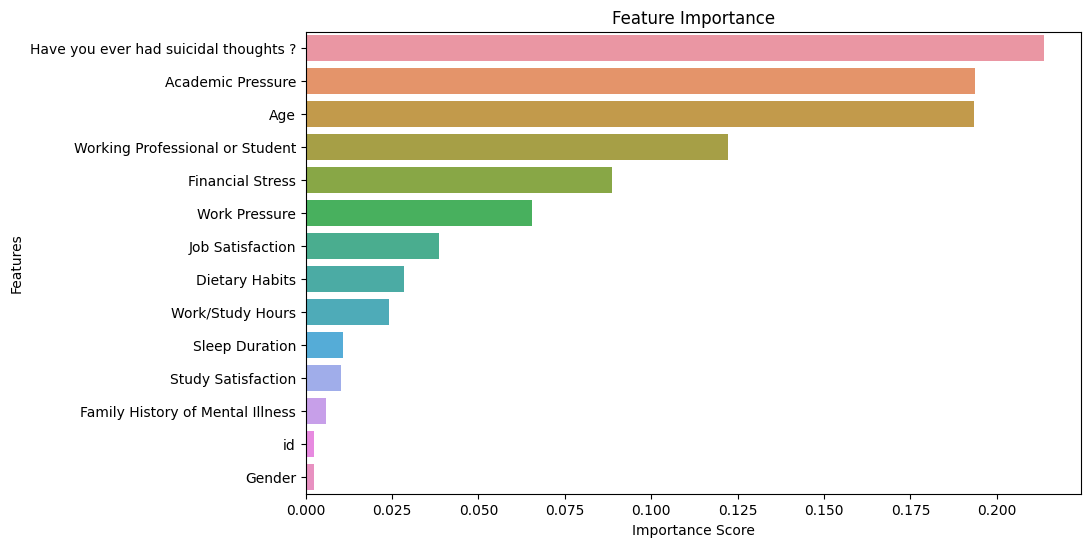

In [90]:
feature_importance = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


### Correlation plot

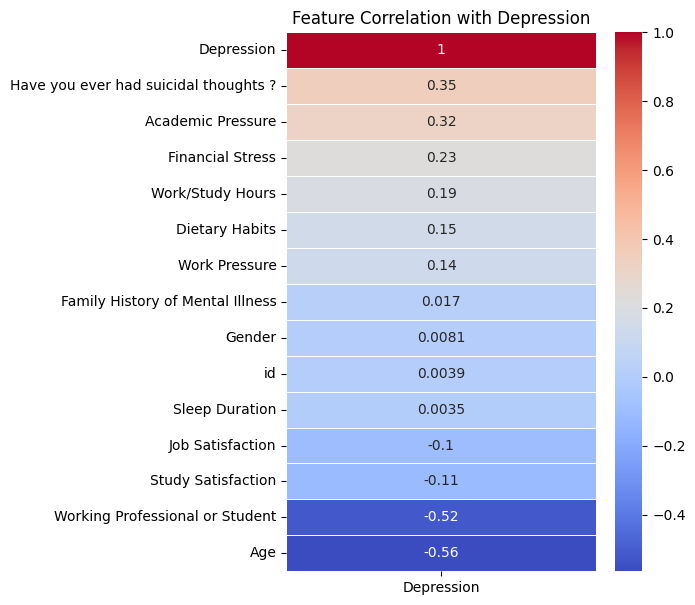

In [91]:
corr_matrix = train.select_dtypes(include=np.number).corr()

# Extract only correlations with 'Depression'
depression_corr = corr_matrix[['Depression']].sort_values(by='Depression', ascending=False)

# Plot heatmap
plt.figure(figsize=(5, 7))
sns.heatmap(depression_corr, cmap='coolwarm', annot=True, linewidths=0.7)
plt.title("Feature Correlation with Depression")
plt.show()

### Histogram

['id', 'Gender', 'Age', 'Working Professional or Student', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

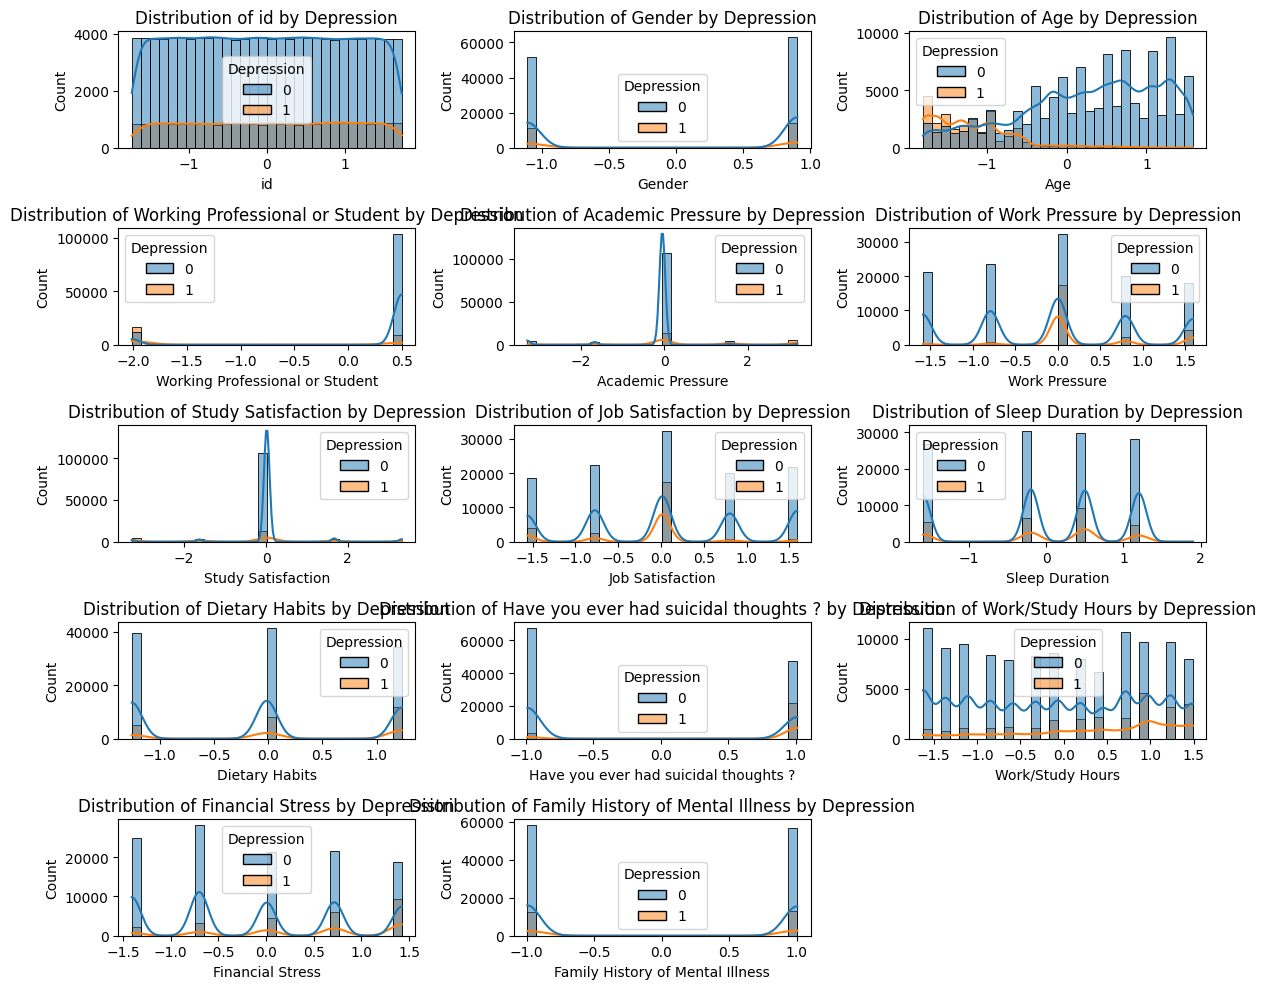

In [92]:
plt.figure(figsize=(12,10))
print(num)
num = ['id', 'Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness']
for i,col in enumerate(num,1):

    plt.subplot(5, 3, i)
    sns.histplot(data=train, x=col, hue="Depression", kde=True, bins=30)
    plt.title(f"Distribution of {col} by Depression")
plt.tight_layout()
plt.show()


 Key Observations from the Graphs:

📌 Age:
The depression distribution seems spread across all ages, but younger and middle-aged people might be slightly more affected.

📌 Academic Pressure:
People experiencing higher academic pressure (above 0) are more likely to have depression.

📌 Work Pressure:
Higher work pressure seems correlated with depression.

📌 Job Satisfaction:
Lower job satisfaction (negative values) is more associated with depression.

📌 Sleep Duration:
People with irregular sleep durations (very high or very low values) show higher depression rates.

📌 Financial Stress:
Higher financial stress seems to contribute to depression.

📌 Work/Study Hours:
Longer working or study hours appear linked to depression.

📌 Suicidal Thoughts:
Almost all people who reported past suicidal thoughts have depression, but since only a small fraction of people have reported this, it is not the strongest predictor in the dataset.

📌 Dietary Habits:
Has very little effect, meaning eating habits alone do not significantly determine depression.

### Submisiion csv file

In [93]:
submission_1 = pd.DataFrame(best_xgb.predict(test), columns=['Depression'])
test.index = range(train.shape[0], train.shape[0] + len(test))
submission_1.index = test.index
submission_1.index.name = 'id'

submission_1.to_csv("submission.csv", encoding='utf-8', index=True)

output_1 = pd.read_csv("submission.csv")
print(output_1)
print(output_1.shape)

           id  Depression
0      140700           0
1      140701           0
2      140702           0
3      140703           0
4      140704           0
...       ...         ...
93795  234495           0
93796  234496           0
93797  234497           0
93798  234498           0
93799  234499           0

[93800 rows x 2 columns]
(93800, 2)


In [94]:
print(output_1['Depression'].value_counts())

Depression
0    90075
1     3725
Name: count, dtype: int64
